## Parameters of a Worm-Like Chain Molecule from Force-Extension Measurements

Francisco J. Palmero Moya @ Nynke Dekker Lab\
28/11/2023

In [22]:
# Import libraries
import yaml
import numpy as np
import matplotlib.pyplot as plt

# Import wlc modules
import sys
sys.path.append('../')
import wlc.models as models
import wlc.fitting as fitting

### Generate synthetic dataset

Text(0, 0.5, 'force [pN]')

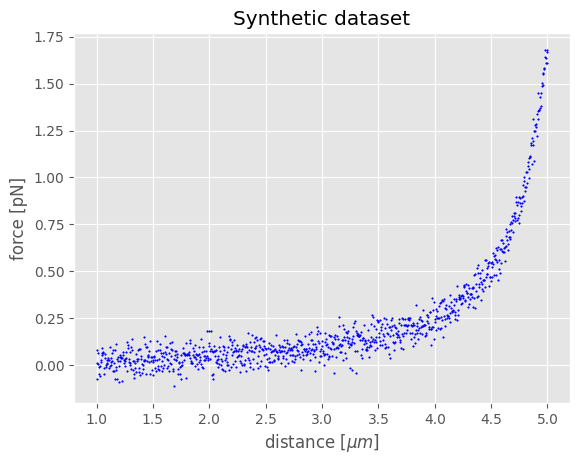

In [23]:
# Synthetic dataset parameters
KB = 0.013806 # Boltzmann constant in pN*nm*K-1
T = 30  # in degrees Celsius
Lc = 5600  # contour length in nm
Lp = 53  # persistence length in nm
S = 1255  # stretch modulus in pN

# Generate data with noise
# F = np.linspace(5, 15, 1000)
# d = models.odijk(F, KB*(273.15 + T), Lc, Lp, S)
# data = d, F + np.random.normal(scale = 0.25, size=len(F))
d = np.linspace(1, 5, 1000)
F = models.bouchiat(d, KB*(273.15 + T), Lc, Lp)
data = d, F + np.random.normal(scale = 0.05, size=len(F))

# Plot the data
fig, ax = plt.subplots()
ax.set_title("Synthetic dataset")
ax.scatter(data[0], data[1], s = 1, c = "blue")
ax.set_xlabel(r"distance [$\mu m$]")
ax.set_ylabel(r"force [pN]")

### Fitting to obtain optimal parameters

In [24]:
# Load the YAML file
with open("../ymls/params.yml", 'r') as file:
    params = yaml.safe_load(file)

In [25]:
# Odijk
model = fitting.WormLikeChain(model="WLC")
print(model)

Worm-like chain model.

    .. math::
        F = \frac{k_BT}{L_p} \left[\frac{1}{4\left(1-\frac{d}{L_c}\right)^2}-\frac{1}{4}+\frac{d}{L_c}\right]

    Parameters
    ----------
    d : array-like
        Distance between end-points. Units: [um]
    kBT : float
        Boltzman contant times Temperature. Units: [pN*nm]
    Lc : float 
        Contour length. Units: [nm]
    Lp : float
        Persistance length. Units: [nm]

    Outputs
    -------
    F : array-like
        Required force to extend a worm-like chain. Units: [pN]

    Bustamante C, Marko JF, Siggia ED, Smith S. 
    Entropic elasticity of lambda-phage DNA. 
    Science. 1994 Sep 9;265(5178):1599-600. 
    doi: 10.1126/science.8079175. PMID: 8079175.
    


In [26]:
# Compile model
model.compile(params)

# Fitting to the data
df = model.fit(data, min_delta=params["min_delta"], max_iters=params["max_iters"], verbose=True)

100%|██████████| 20/20 [00:00<00:00, 1343.10it/s]


In [27]:
# Results are stored in a dataframe
df.head()

,opt_Lc[nm],opt_Lp[nm],opt_S[pN],nFittings,filename
0,5561.272695,60.421308,None,4,None


In [28]:
# The progress along iterations
model.df_full

,Lc[nm],Lp[nm],S[pN],Chisqr,filename,iter,dLp[nm]
0,5561.272695,60.421308,None,2.50008,None,1,inf
1,5561.272695,60.421308,None,2.50008,None,2,4.373256e-09
2,5561.272695,60.421308,None,2.50008,None,3,2.115996e-11
3,5561.272695,60.421308,None,2.50008,None,4,0.000000e+00


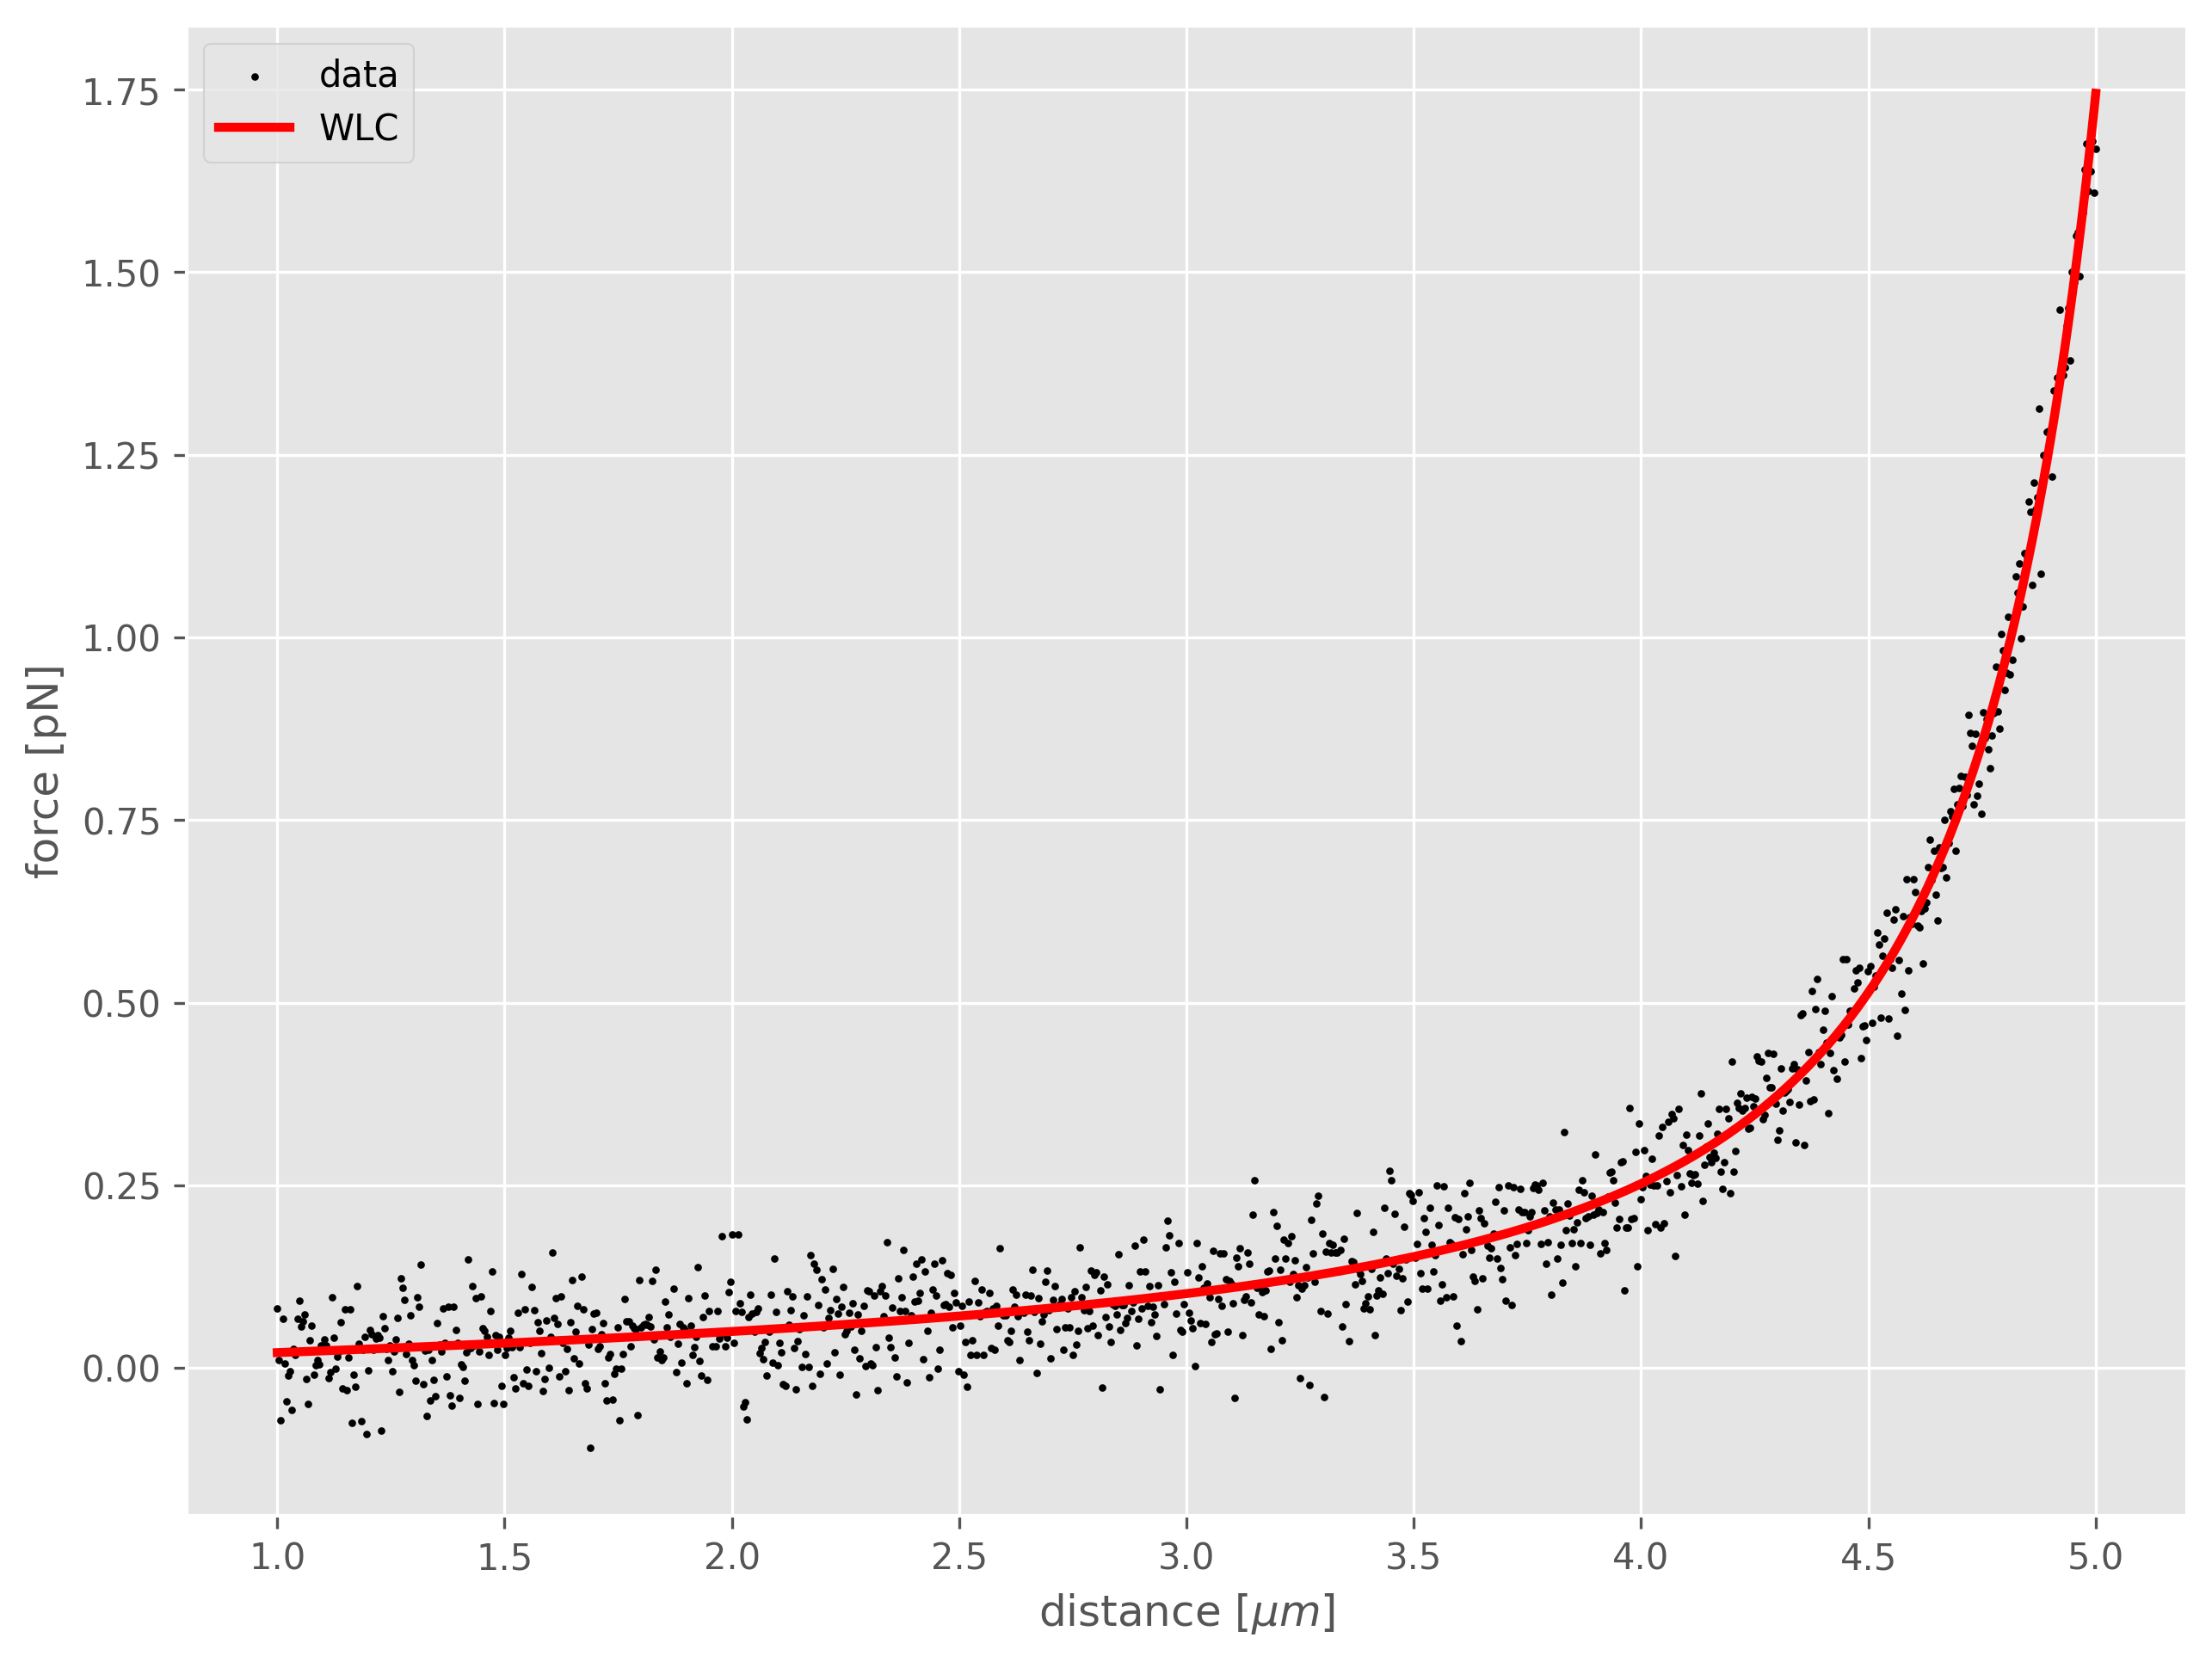

In [29]:
# Plot results
model.plot(data)

In [30]:
# Summary of fitting statistics
model.stats()

[[Model]]
    Model(WLC)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 1000
    # variables        = 2
    chi-square         = 2.50007953
    reduced chi-square = 0.00250509
    Akaike info crit   = -5987.43273
    Bayesian info crit = -5977.61722
    R-squared          = 0.97542619
[[Variables]]
    kBT:  4.185289 (fixed)
    Lc:   5561.27270 +/- 5.70239996 (0.10%) (init = 5561.273)
    Lp:   60.4213079 +/- 0.79563153 (1.32%) (init = 60.42131)
[[Correlations]] (unreported correlations are < 0.100)
    C(Lc, Lp) = -0.9512


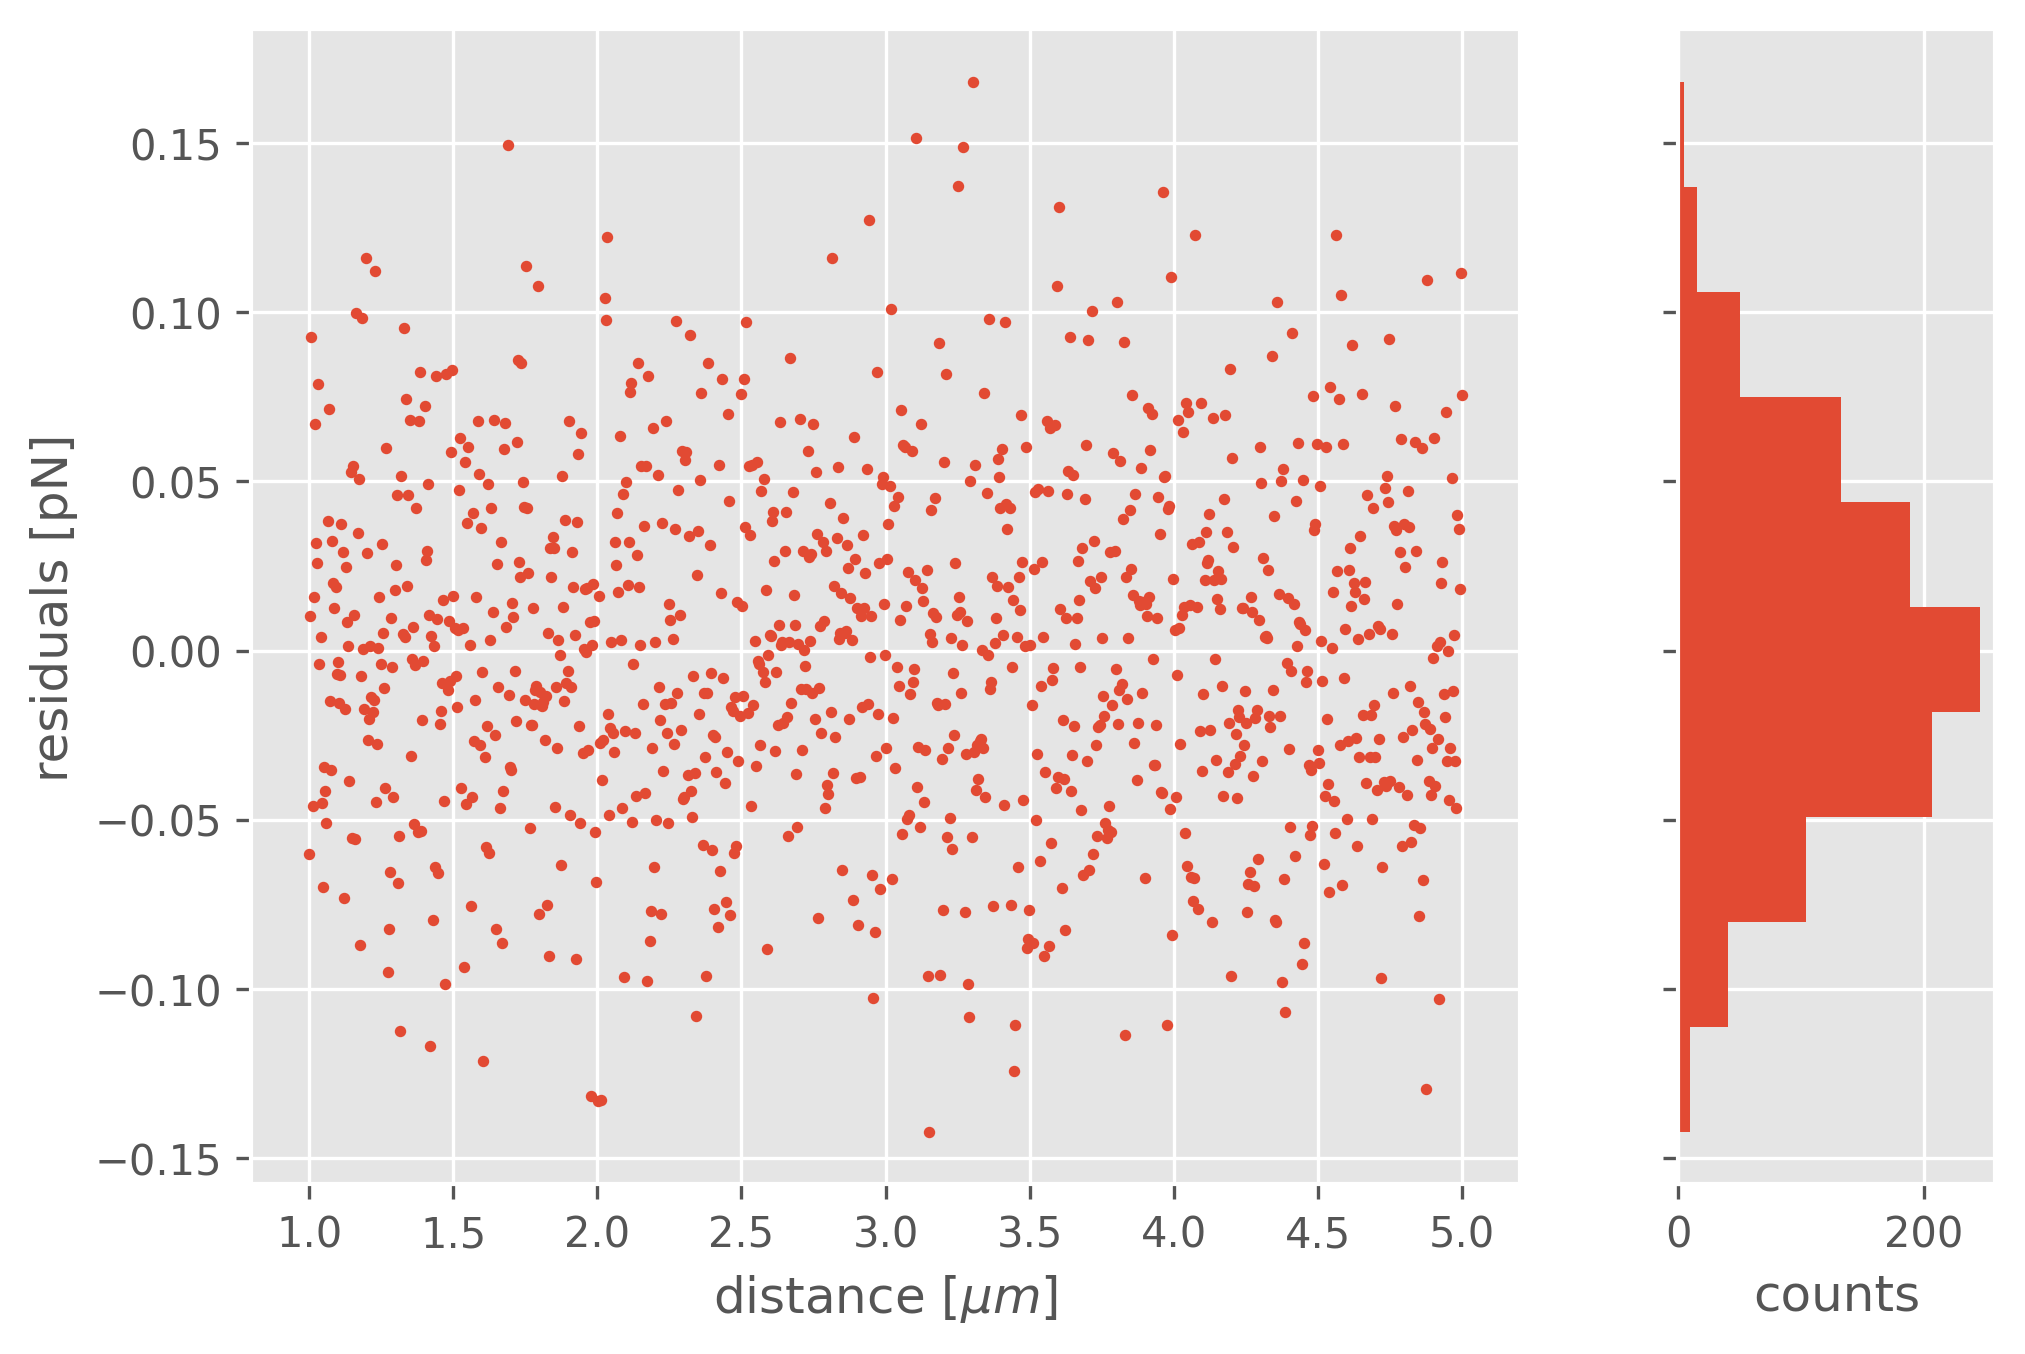

In [31]:
model.plot_residuals(data)

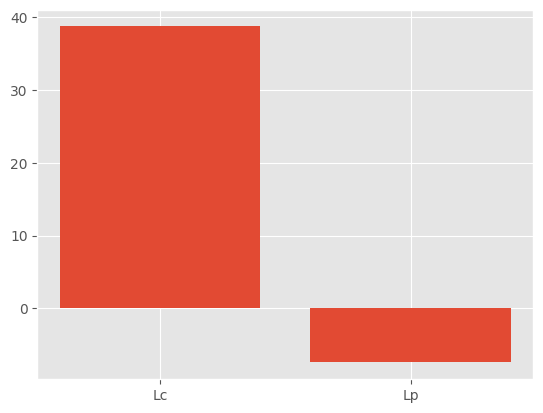

In [32]:
if "S" in model.result.params.valuesdict():
    plt.bar(["Lc", "Lp", "S"], [Lc - model.result.params['Lc'].value, Lp-model.result.params['Lp'].value, S-model.result.params['S'].value])
else:
    plt.bar(["Lc", "Lp"], [Lc - model.result.params['Lc'].value, Lp-model.result.params['Lp'].value])